# Lending Club Case Study
## -- *By Abhishek Mukherjee and Abhishek Shukla*

### 1. Problem Statement:
We are given a dataset about a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

### 2. Data Collection

In [1]:
# Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the loan dataset for EDA. The loan file is in same directory as the ipynb notebook

loan_df = pd.read_csv("loan.csv")
pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",500)

In [3]:
# Check if data is correctly loaded or any errors
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### 3. Data Exploration and Cleaning

We will dedicate this section to explore the columns, try and filter columns of relevance for analysis and also clean/impute the columns data as appropriate

In [4]:
# Get dataset information (info), shape, and data types

# Dataset info with verbose option to display all columns
loan_df.info(verbose=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

In [5]:
loan_dataset_shape = loan_df.shape  #rows and columns
loan_dataset_data_types = loan_df.dtypes #data types - dtypes
print("\nDataset Shape:", loan_dataset_shape)


Dataset Shape: (39717, 111)


In [6]:
print("\nData Types:")
print(loan_dataset_data_types)


Data Types:
id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state           

In [7]:
# Check null values and percentages

null_values = loan_df.isnull().sum()
print ("Null Values in each column:")
null_values

Null Values in each column:


id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [8]:
# Compute null/NaN percentages
null_perc = round(loan_df.isnull().mean()*100, 2)
print ("Null Percentages in each column:")
null_perc

Null Percentages in each column:


id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [9]:
# Drop all columns where missing values are greater than 30% i.e. retain all columns with less than 30% missing values
loan_df_clean = loan_df.loc[:,loan_df.isnull().mean()*100 < 30]

In [10]:
# Find out the missing values after dropping columns with mostly missing data
missing_value_perc = round(loan_df_clean.isnull().mean()*100,2)
print("Missing data percent greater than 0:")
missing_value_perc[missing_value_perc > 0]

Missing data percent greater than 0:


emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [11]:
loan_df_clean.shape

(39717, 53)

In [12]:
# Lets also check missing values from rows which has more than 5 missing values
loan_df_clean[loan_df_clean.isnull().sum(axis=1) > 5]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


Looks like there are no rows which has more than 5 columns with missing values

In [13]:
# Lets also check missing values from rows which has more than 4 missing values but less than 5
loan_df_clean[(loan_df_clean.isnull().sum(axis=1) > 4) & (loan_df_clean.isnull().sum(axis=1) <=5)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
39659,121568,121574,4000,4000,1925.0,36 months,9.64%,128.41,B,B4,NaN,< 1 year,NONE,100000.0,Not Verified,Aug-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Refinancing high interest loan,950xx,CA,15.00,0,May-99,1,6,0,8155,14.90%,8,f,0.0,0.0,4622.489229,2224.58,4000.0,622.49,0.0,0.0,0.0,Sep-10,129.76,Aug-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39660,121535,121373,2800,2800,1625.0,36 months,8.70%,88.65,B,B1,NaN,< 1 year,NONE,120000.0,Not Verified,Aug-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,Baby is coming,024xx,MA,15.00,0,May-99,1,6,0,8155,14.90%,8,f,0.0,0.0,3191.218575,1852.05,2800.0,391.22,0.0,0.0,0.0,Sep-10,89.80,Aug-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39700,98276,98268,5400,5400,200.0,36 months,7.75%,168.60,A,A3,NaN,< 1 year,RENT,8000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,educational,Help with college expenses,306xx,GA,3.00,0,Mar-89,0,4,0,1321,16.50%,4,f,0.0,0.0,6069.341452,224.80,5400.0,669.34,0.0,0.0,0.0,Jul-10,169.09,Dec-13,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39704,93277,93254,3000,3000,950.0,36 months,8.70%,94.98,B,B1,NaN,< 1 year,MORTGAGE,25000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Home Based Bakery,017xx,MA,14.54,0,Sep-00,1,10,0,3660,7.80%,13,f,0.0,0.0,3419.144850,1082.73,3000.0,419.14,0.0,0.0,0.0,Jul-10,97.45,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39706,92676,92671,5000,5000,150.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,180000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,remodelin my kitchen,530xx,WI,5.55,0,Jun-96,0,12,0,40934,26.30%,39,f,0.0,0.0,5645.957239,169.38,5000.0,645.96,0.0,0.0,0.0,Jul-10,157.31,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


We will retain these rows as the missing values are in columns which don't seem very significant at this point for analysis.

In [14]:
# Lets check the 'emp_title' and 'emp_length' columns
loan_df_clean['emp_title'].value_counts()

US Army                          134
Bank of America                  109
IBM                               66
AT&T                              59
Kaiser Permanente                 56
                                ... 
Freedom Mortgage                   1
Rudy's Barber Shops                1
Local 825 Operating Engineers      1
Borgata Hotel Casino & Spa         1
WeiserMazars LLP                   1
Name: emp_title, Length: 28820, dtype: int64

The values seem to represent the organization or government department the employee works and are not a finite set of values from where the most frequently occuring one can be used for missing value imputation. The most frequently occuring value seem to be 'US Army' which will be assigned if we impute the missing values which doesn't seem reasonable. This column don't seem reasonable for analysis to answer the question of default indicator and for future default prediction purposes unless we have a fixed enumeration of employment titles in future.

In [15]:
loan_df_clean = loan_df_clean.drop(columns=['emp_title'])

In [16]:
# Lets check the 'emp_length' column
loan_df_clean['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [17]:
loan_df_clean['emp_length'].mode()[0]

'10+ years'

We will impute the missing values with mode of the column data

In [18]:
# Lets check the Loan Title column to see types of loans
loan_df_clean['title'].value_counts()

Debt Consolidation          2184
Debt Consolidation Loan     1729
Personal Loan                659
Consolidation                517
debt consolidation           505
                            ... 
Pay off the cards              1
Moving and Car Financing       1
 Freedom Loan                  1
Bono                           1
New Years Resolution....       1
Name: title, Length: 19615, dtype: int64

The 'title' column will need significant cleaning as we can clearly see that its a free text entry of loan title. There is no point in imputing missing values or using this column for analysis

In [19]:
# Lets check the Loan Purpose column to see if we can get types of loan
loan_df_clean['purpose'].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
house                   381
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

We can use this column to check which types of loan have more defaults

In [20]:
# Lets check the income verification status column
loan_df_clean['verification_status'].value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

We will also use this categorical variable to check default status

In [21]:
# Lets check the 'term' column
loan_df_clean['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

We need to change it to a numerical column type

In [22]:
# Remove the months text
loan_df_clean['term'] = loan_df_clean['term'].apply(lambda x: int(x[:3]))

In [23]:
loan_df_clean['term'].value_counts()

36    29096
60    10621
Name: term, dtype: int64

In [24]:
# Lets check the 'int_rate' column type
loan_df_clean['int_rate'].value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
7.49%     656
11.71%    607
9.99%     603
7.90%     582
5.42%     573
11.99%    532
12.69%    491
10.37%    468
6.03%     447
12.99%    446
8.49%     445
12.42%    442
10.65%    435
5.79%     410
8.90%     402
7.29%     397
6.62%     396
11.86%    391
14.27%    390
10.59%    380
9.63%     378
9.91%     377
5.99%     347
7.14%     341
6.99%     336
11.11%    331
16.77%    327
12.53%    327
10.74%    312
6.54%     305
6.91%     303
8.94%     294
7.66%     292
13.61%    291
15.99%    286
13.98%    284
13.23%    263
11.12%    259
13.99%    257
6.17%     252
12.68%    251
10.00%    251
10.75%    250
10.36%    250
11.36%    247
16.49%    241
11.83%    233
18.25%    230
10.62%    228
14.65%    222
13.06%    220
10.38%    219
10.25%    218
15.23%    215
14.96%    214
16.89%    209
15.65%    208
11.14%    206
6.92%     204
17.27%    203
12.18%    203
15.27%    200
15.95%    199
16.32%    198
14.79%    192
8.00%     191
17.49%

We need to remove the '%' from the end of the percent value

In [25]:
loan_df_clean['int_rate'] = loan_df_clean['int_rate'].apply(lambda x: float(x[0:-1]) if x[-1] == '%' else float(x))

In [26]:
loan_df_clean['int_rate'].value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
7.49     656
11.71    607
9.99     603
7.90     582
5.42     573
11.99    532
12.69    491
10.37    468
6.03     447
12.99    446
8.49     445
12.42    442
10.65    435
5.79     410
8.90     402
7.29     397
6.62     396
11.86    391
14.27    390
10.59    380
9.63     378
9.91     377
5.99     347
7.14     341
6.99     336
11.11    331
12.53    327
16.77    327
10.74    312
6.54     305
6.91     303
8.94     294
7.66     292
13.61    291
15.99    286
13.98    284
13.23    263
11.12    259
13.99    257
6.17     252
12.68    251
10.00    251
10.36    250
10.75    250
11.36    247
16.49    241
11.83    233
18.25    230
10.62    228
14.65    222
13.06    220
10.38    219
10.25    218
15.23    215
14.96    214
16.89    209
15.65    208
11.14    206
6.92     204
17.27    203
12.18    203
15.27    200
15.95    199
16.32    198
14.79    192
8.00     191
17.49    190
15.21    187
12.73    187
9.62     186
15.58    185
9.32     184

In [27]:
loan_df_clean.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [28]:
# Lets impute remaining missing values.
# For numerical columns we will impute with median
numerical_columns = loan_df_clean.select_dtypes(include=["float64","int64"]).columns
loan_df_clean[numerical_columns] = (loan_df_clean[numerical_columns]
                                    .apply(lambda column:column.fillna(column.median())))


In [29]:
# For categorical columns we will impute with mode
categorical_columns = loan_df_clean.select_dtypes(include=["object"]).columns
loan_df_clean[categorical_columns] = (loan_df_clean[categorical_columns]
                                      .apply(lambda column:column.fillna(column.mode()[0])))

In [30]:
# Find out the missing values after dropping columns with mostly missing data
missing_value_perc = round(loan_df_clean.isnull().mean()*100,2)
missing_value_perc[missing_value_perc > 0]

Series([], dtype: float64)

In [31]:
loan_df_clean.shape

(39717, 52)

So the missing data has been imputed. Now we have to proceed to find outliers and filter the columns and rows for analysis (Univariate, Bivariate and Multivariate Analysis)

## 4. Univariate Analysis

We had already started exploring the columns/variables earlier which we will continue here and filter them further for analysis and draft visualizations to observe some trends.

In [32]:
#Lets look at loan_status column
loan_df_clean['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

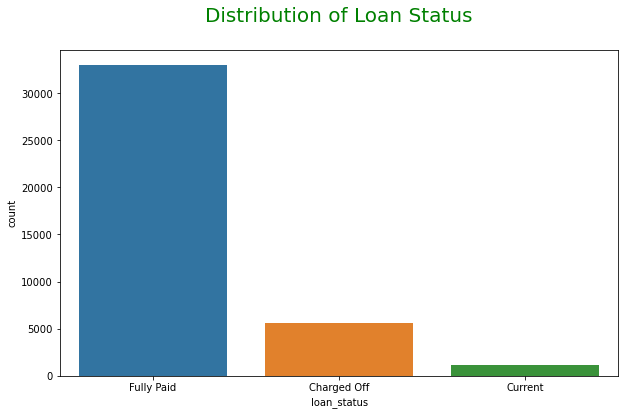

In [33]:
plt.figure(figsize=[10,6])
sns.countplot(data=loan_df_clean, x='loan_status')
plt.title("Distribution of Loan Status\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

For our analysis, in order to analyze data to predict variables that indicate loan default we need to only filter data where the loan is either 'Fully Paid' off or 'Charged Off' i.e defaulted. The 'Current' category are in progress loans which can then use the analysis to predict future loan defaults (but is not necessary for now)

In [34]:
# Filtering rows where loan status is either 'Fully Paid' or 'Charged Off'
loan_df_filtered = loan_df_clean[loan_df_clean['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [35]:
loan_df_filtered['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

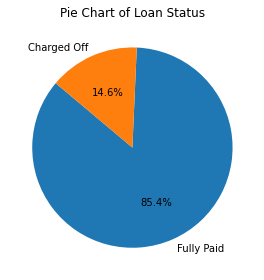

In [36]:
# lets compare the percentage of Fully paid vs defaults in the filtered dataset
loan_status_counts = loan_df_filtered['loan_status'].value_counts()
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Loan Status')

# Adjusting layout
plt.tight_layout()
plt.show()

Around 15% of loans have resulted in 'Default' or Charge-Off status in current dataset.

### Columns Filtering for Analysis

Lets check the number of columns for the filtered dataset

In [37]:
loan_df_filtered.shape

(38577, 52)

**Note**: There are 52 columns that need to be analyzed. All of the columns may or may not be relevant for the requested analysis to identify patterns of loan 'default' behaviour. We will try to be pragmatic and take some subsets of these columns to continue with our analysis.
Lets check the names of the columns now

In [38]:
loan_df_filtered.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

Lets check the data in these columns for the first 10 values and try to eliminate few of them

In [39]:
loan_df_filtered.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,f,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36,18.64,109.43,E,E1,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,f,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,f,0.0,0.0,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,Apr-12,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,f,0.0,0.0,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
10,1070078,1305201,6500,6500,6500.0,60,14.65,153.45,C,C3,5 years,OWN,72000.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,High intrest Co

**Column/Variable Filtering/Elimination Approach**:
1. We can safely ignore the 'id' and 'member_id' columns as we are not doing analysis of individuals, rather finding few patterns in the whole dataset.
2. Columns 'loan_amnt' and 'funded_amnt' have the same values. 'funded_amnt' seem to be the total amount of loan commited by the company till that point of time. 'loan_amnt' on the other hand may be updated/reduced by credit department. For analysis purposes we will take the 'loan_amnt' and drop 'funded_amnt'.
3. Column 'funded_amnt_inv' is the share commited by investors and for understanding default behavior we will ignore this column.
4. Columns 'issue_d', 'url', 'title', 'zip_code', 'addr_state', 'delinq_2yrs', 'earliest_cr_line', 'initial_list_status' also don't seem relevant to identify patterns.
5. Columns 'inq_last_6mths', 'open_acc', 'pub_rec', 'last_credit_pull_d' are about the inquiries, open credit accounts and derogatory public records. We can check these later for defaulters.
6. Columns 'out_prncp', 'out_prncp_inv' are about ongoing loan and priniple amount received, don't seem relevant. Same with 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee'.
7. Columns 'recoveries', 'collection_recovery_fee' are for charged off loans but they don't contribute to identify default patterns.
8. Column 'collections_12_mths_ex_med' is about number of collections in last 12 months excluding medical. This may offer some insight for defaulters, how many collections were made before defaulting.
9. Column 'chargeoff_within_12_mths' is about charge offs and seem to be a metric tracked by the financial company, not relevant for identifying borrower pattern prior to charge off.
10. Column 'delinq_amnt' is again post charge off and will not contribute to identifying patterns for default.
11. Column 'public_rec_bankrupties' can indicate some insights if for example the borrower is a small business or business applying for loan.
12. Column 'tax_liens' don't seem relevant for analysis.

**Note**: This elimination technique is used based on context of the question at hand i.e identify patterns of loan defaults from variables of interest and a different approach may be required based on a different question.

In [40]:
# Lets drop non-relevant columns

loan_df_filtered = (loan_df_filtered.drop(columns=
                                          ['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'issue_d', 'url', 'title', 
                                           'zip_code', 'addr_state', 'delinq_2yrs', 'earliest_cr_line', 'initial_list_status',
                                           'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
                                           'total_rec_int', 'total_rec_late_fee','recoveries', 'collection_recovery_fee', 
                                           'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']))

In [41]:
# Lets check if few of the aforementioned columns offer any insights for loans with default. Thse columns being
# pymnt_plan, inq_last_6mths, pub_rec, last_credit_pull_d, collections_12_mths_ex_med,
# pub_rec_bankruptcies, policy_type, acc_now_delinq and application_type

loan_df_filtered.loc[loan_df_filtered['loan_status'] == 'Charged Off', ['loan_status', 'pymnt_plan', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'last_credit_pull_d', 'collections_12_mths_ex_med','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies']]

,loan_status,pymnt_plan,inq_last_6mths,open_acc,pub_rec,total_acc,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,application_type,pub_rec_bankruptcies
1,Charged Off,n,5,3,0,4,Sep-13,0.0,0,INDIVIDUAL,0.0
8,Charged Off,n,2,11,0,13,Aug-12,0.0,0,INDIVIDUAL,0.0
9,Charged Off,n,0,2,0,3,Mar-13,0.0,0,INDIVIDUAL,0.0
12,Charged Off,n,1,4,0,9,Nov-12,0.0,0,INDIVIDUAL,0.0
14,Charged Off,n,2,14,0,29,Mar-14,0.0,0,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...
39667,Charged Off,n,1,11,0,32,May-16,0.0,0,INDIVIDUAL,0.0
39668,Charged Off,n,3,9,0,35,May-16,0.0,0,INDIVIDUAL,0.0
39669,Charged Off,n,0,11,0,28,May-16,0.0,0,INDIVIDUAL,0.0
39678,Charged Off,n,1,9,0,11,Oct-09,0.0,0,INDIVIDUAL,0.0


In [42]:
# Lets see the value of payment plans for defaulters vs whole dataset
loan_df_filtered[loan_df_filtered['loan_status'] == 'Charged Off']['pymnt_plan'].value_counts()

n    5627
Name: pymnt_plan, dtype: int64

In [43]:
loan_df_filtered['pymnt_plan'].value_counts()

n    38577
Name: pymnt_plan, dtype: int64

In [44]:
# Lets check application type for defaulters vs whole dataset
loan_df_filtered[loan_df_filtered['loan_status'] == 'Charged Off']['application_type'].value_counts()

INDIVIDUAL    5627
Name: application_type, dtype: int64

In [45]:
loan_df_filtered['application_type'].value_counts()

INDIVIDUAL    38577
Name: application_type, dtype: int64

In [46]:
# Lets check the number of collections since last 12 months for defaulters excluding medical reasons vs whole dataset
loan_df_filtered[loan_df_filtered['loan_status'] == 'Charged Off']['collections_12_mths_ex_med'].value_counts()

0.0    5627
Name: collections_12_mths_ex_med, dtype: int64

In [47]:
loan_df_filtered['collections_12_mths_ex_med'].value_counts()

0.0    38577
Name: collections_12_mths_ex_med, dtype: int64

In [48]:
# Lets check the number of delinquent accounts for defaulters vs whole dataset
loan_df_filtered[loan_df_filtered['loan_status'] == 'Charged Off']['acc_now_delinq'].value_counts()

0    5627
Name: acc_now_delinq, dtype: int64

In [49]:
loan_df_filtered['acc_now_delinq'].value_counts()

0    38577
Name: acc_now_delinq, dtype: int64

In [50]:
# Lets check the number of public records for bankrupties for defaulters vs whole dataset
loan_df_filtered[loan_df_filtered['loan_status'] == 'Charged Off']['pub_rec_bankruptcies'].value_counts()

0.0    5259
1.0     366
2.0       2
Name: pub_rec_bankruptcies, dtype: int64

In [51]:
loan_df_filtered['pub_rec_bankruptcies'].value_counts()

0.0    36935
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [52]:
# Lets check the number of public derogatory records for defaulters vs whole dataset
loan_df_filtered[loan_df_filtered['loan_status'] == 'Charged Off']['pub_rec'].value_counts()

0    5160
1     457
2      10
Name: pub_rec, dtype: int64

In [53]:
loan_df_filtered['pub_rec'].value_counts()

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64

In [54]:
# Lets check the number of credit agency inquiries to borrower credit file. 
# A large number of inquiries indicate credit account opening and borrowing which in turn indicate financial issues
loan_df_filtered[loan_df_filtered['loan_status'] == 'Charged Off']['inq_last_6mths'].value_counts()

0    2280
1    1677
2     943
3     619
4      51
5      28
6      16
7      10
8       3
Name: inq_last_6mths, dtype: int64

Looks like the defaulters were not on any payment plan, had zero collections since last 12 months, also had zero accounts now delinq and they were individual applicants. We will also drop these columns along with last_credit_pull_d. Also most of them have zero public records for bankruptcies

In [55]:
# Drop aforementioned columns
loan_df_filtered = loan_df_filtered.drop(columns=['pymnt_plan', 'application_type', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'acc_now_delinq'])

In [56]:
# Lets check number of columns remaining
loan_df_filtered.shape

(38577, 23)

In [57]:
loan_df_filtered.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'last_pymnt_d',
       'last_pymnt_amnt', 'policy_code', 'pub_rec_bankruptcies'],
      dtype='object')

Lets filter some more columns

In [58]:
# Check Policy Code
loan_df_filtered['policy_code'].value_counts()

1    38577
Name: policy_code, dtype: int64

Lets also drop policy code which is same for all recors, last_payment_d and last_payment_amnt


In [59]:
loan_df_filtered = loan_df_filtered.drop(columns=['policy_code','last_pymnt_d', 'last_pymnt_amnt'])

In [60]:
loan_df_filtered.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

We are left with 20 columns for analysis. Lets start with few of them. The variables namely Loan Amount ('loan_amnt'), Interest Rate ('int_rate'), Annual Income ('annual_inc'),Total Credit Lines ('total_acc'), Open Credit Lines ('open-acc') are continuous/numerical variables so we will use histograms to check out their distribution for univariate analysis.

The variables namely Loan Purpose ('purpose'), Income Verification Status ('verification_status'), Loan Term ('term'), Loan Grade ('grade') and Loan Sub Grade ('sub_grade') are categorical in nature so we will use countplot to visualize their distribution below.

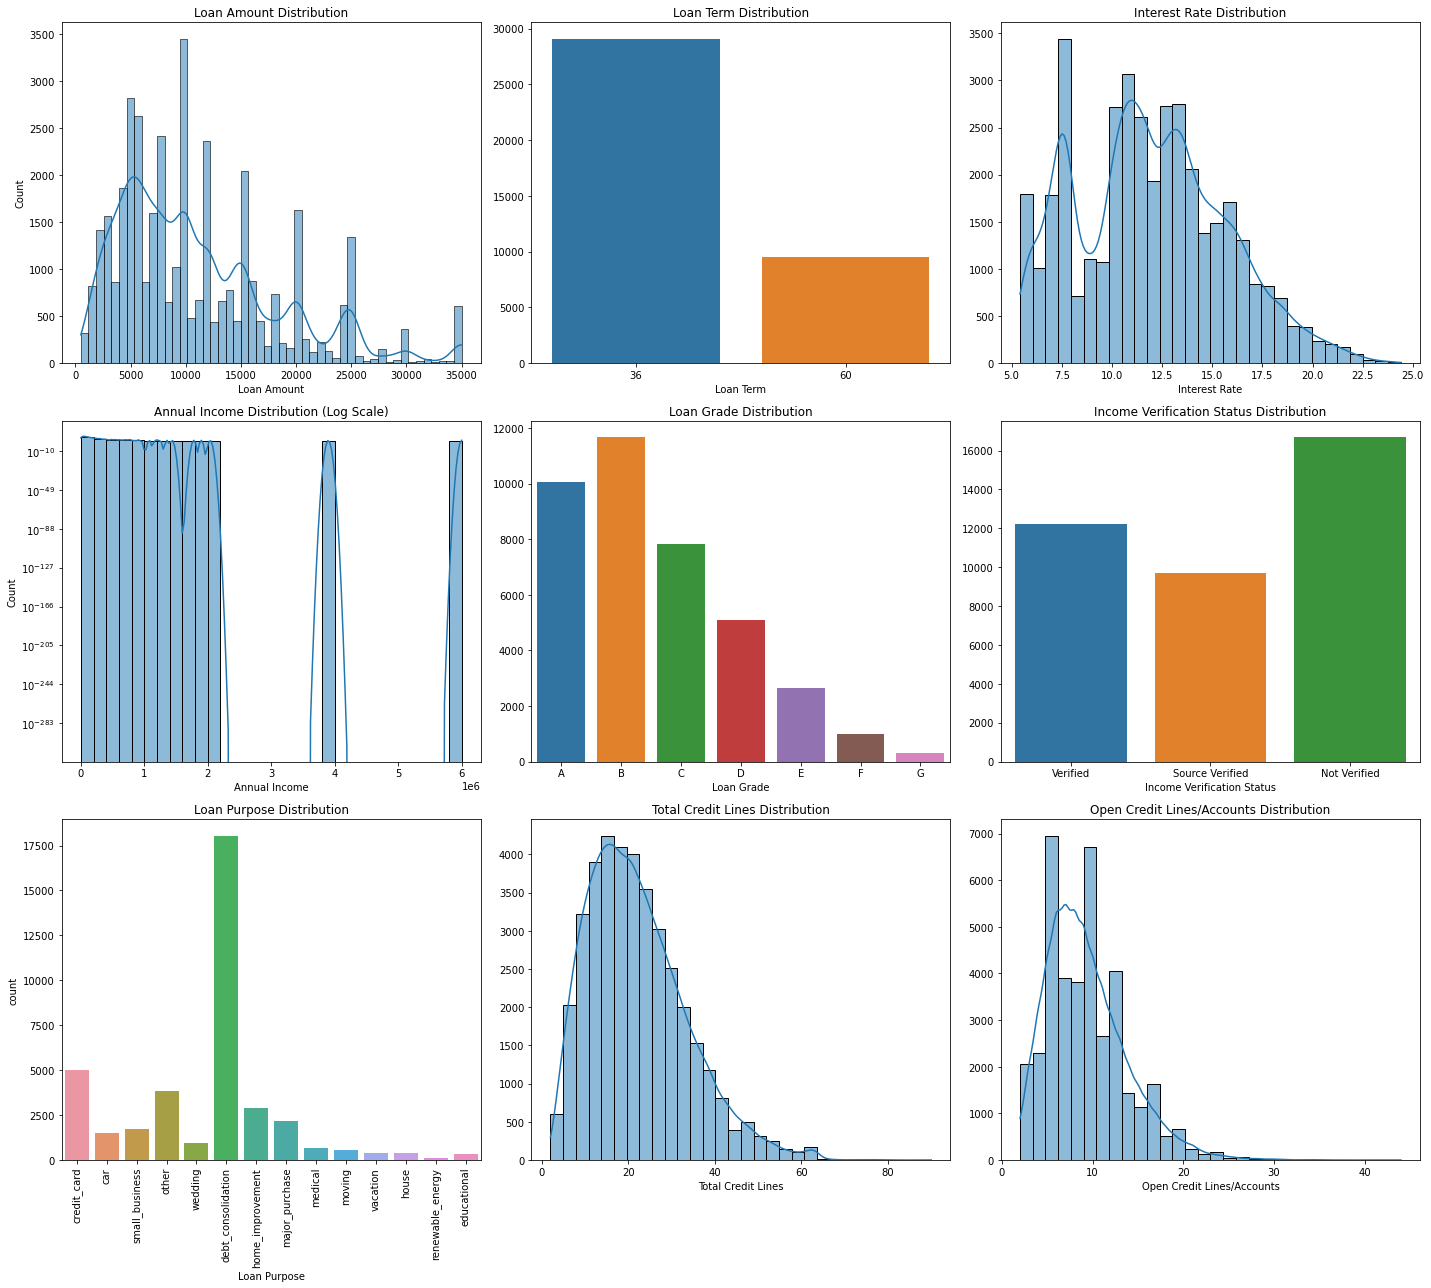

In [61]:
# Lets check out the visualizations of the aforementioned variables distribution
plt.figure(figsize=[20, 18])

# Loan Amount Distribution
plt.subplot(3, 3, 1)
sns.histplot(data=loan_df_filtered, x='loan_amnt', bins=50, kde=True)
plt.xlabel('Loan Amount')
plt.title('Loan Amount Distribution')

# Term Distribution
plt.subplot(3, 3, 2)
sns.countplot(data=loan_df_filtered, x='term' ).set(ylabel=None)
plt.xlabel('Loan Term')
plt.title('Loan Term Distribution')

# Interest Rate Distribution
plt.subplot(3, 3, 3)
sns.histplot(data=loan_df_filtered, x='int_rate', bins=30, kde=True).set(ylabel=None)
plt.xlabel('Interest Rate')
plt.title('Interest Rate Distribution')

# Annual Income Distribution (log scale for clarity)
plt.subplot(3, 3, 4)
sns.histplot(data=loan_df_filtered, x='annual_inc', bins=30, kde=True)
plt.yscale('log')
plt.xlabel('Annual Income')
plt.title('Annual Income Distribution (Log Scale)')

# Loan Grade Distribution
plt.subplot(3, 3, 5)
sns.countplot(data=loan_df_filtered, x='grade', order=sorted(loan_df_filtered['grade'].unique())).set(ylabel=None)
plt.xlabel('Loan Grade')
plt.title('Loan Grade Distribution')

# Income Verification status Distribution
plt.subplot(3, 3, 6)
sns.countplot(data=loan_df_filtered, x='verification_status').set(ylabel=None)
plt.xlabel('Income Verification Status')
plt.title('Income Verification Status Distribution')

# Loan Purpose Distribution
plt.subplot(3, 3, 7)
sns.countplot(data=loan_df_filtered, x='purpose')
plt.xlabel('Loan Purpose')
plt.xticks(rotation=90)
plt.title('Loan Purpose Distribution')

# Total Credit Lines on file for Borrowers Distribution
plt.subplot(3, 3, 8)
sns.histplot(data=loan_df_filtered, x='total_acc', bins=30, kde=True).set(ylabel=None)
plt.xlabel('Total Credit Lines')
plt.title('Total Credit Lines Distribution')


# Open Credit Lines/Accounts Distribution
plt.subplot(3, 3, 9)
sns.histplot(data=loan_df_filtered, x='open_acc', bins=30, kde=True).set(ylabel=None)
plt.xlabel('Open Credit Lines/Accounts')
plt.title('Open Credit Lines/Accounts Distribution')

plt.tight_layout()
plt.show()

The Loan Sub-Grade distribution  and Credit Inquiries are plotted separately to get a better view

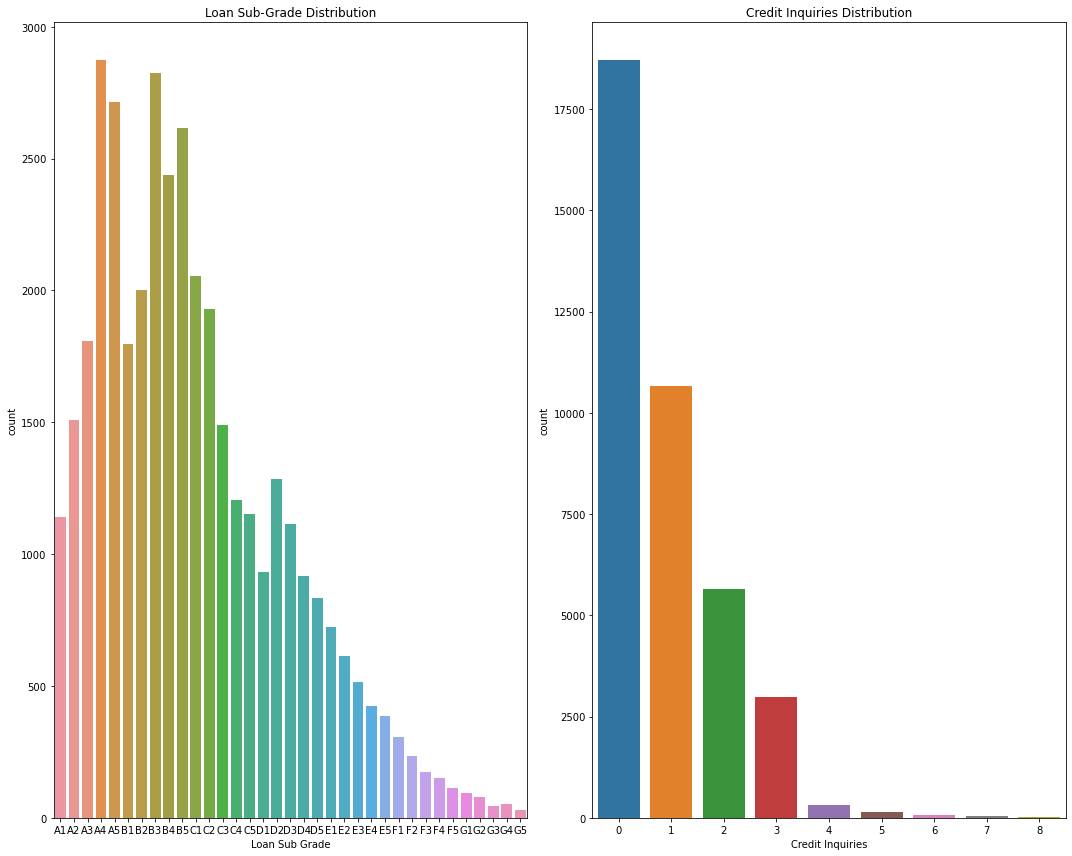

In [62]:
#Loan Sub-Grade Distribution
plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
sns.countplot(data=loan_df_filtered, x='sub_grade', order=sorted(loan_df_filtered['sub_grade'].unique()))
plt.title('Loan Sub-Grade Distribution')
plt.xlabel('Loan Sub Grade')

# Credit Inquiries Distribution
plt.subplot(1, 2, 2)
sns.countplot(data=loan_df_filtered, x='inq_last_6mths')
plt.title('Credit Inquiries Distribution')
plt.xlabel('Credit Inquiries')
plt.tight_layout()
plt.show()

**Analysis**:

***Loan Amount Distribution***: From the above plot we can see that the distribution is right skewed with highest amount of loans hovered around the 10,000 mark and large loan amounts were less. 

***Loan Term Distribution***: The plot shows that more people opted for a 36 months term rather than 60 months term. We will have to correlate this with defaults to check which term category defaulted most

***Interest Rate Distribution***: The interest rate has some highs around 7.5 and between 10.0 - 12.0 %. This needs to be correlated with Loan Grade and Sub-Grades to see at which grades/sub-grades higher interest rates are offered and where the defaults happen

***Annual Income Distribution***: We have taken a log scale for income. We see some clustering around the lower incomes i.e most people have incomes below 100k. Also it may be relevant that folks who take loan at lower income, higher installments and with a higher DTI (Debt to Income Ratio) could have a chance of default. We will need to further do some bivariate/multivariate correlation to arive at that notion convincingly.

***Open Credit Line Distribution***: This indicates the number of open credit lines for a borrower. A high number can indicate financial strain. There are couple of other indicators like Debt-To-Income Ratio, Revolving Credit Balance and Revolving Credit Utilization which we will see shortly. Together these variables may indicate how much debt a borrower has and how they manage the debt and if they are able to repay loans with moderate to high existing debt.

***Total Credit Line Distribution***: This represents total credit lines the borrower has and some of them may be open and some of them may be closed. we will mainly use Open credit accounts and other variables mentioned above like DTI, revolving balance etc. to find patterns of default.


For categorical variables:

***Loan Grade Distribution***: Loan grades are concentrated around A and B grades, reflecting higher creditworthiness. We need to check the loan grades of the defaulters

***Loan Sub-Grade Distribution***: The sub-grades A4, A5, B3, B4, B5, C1 and C2 are the most common.

***Income Verification Status Distribution***: The not verified source seems to be most common. We will need to check which category defaulters belong to

***Loan Purpose Distribution***: The most common loan type is "Debt Consolidation". We will need to check which category of purpose defaulters tend to borrow more.

***Credit Inquiries Distribution***: A large number of inquiries indicate credit account opening and borrowing which in turn indicate finanacial issues. This can also be correlated with open credit accounts, revolving credit balance and revolving credit utilization to ascertain borrowing and repayment patterns among borrowers.


The Loan Grade and Sub-Grades are analyzed separately to see the distribution of these in total loan amount.

In [63]:
sub_grade_counts = loan_df_filtered.groupby(['grade', 'sub_grade']).size().unstack().fillna(0)

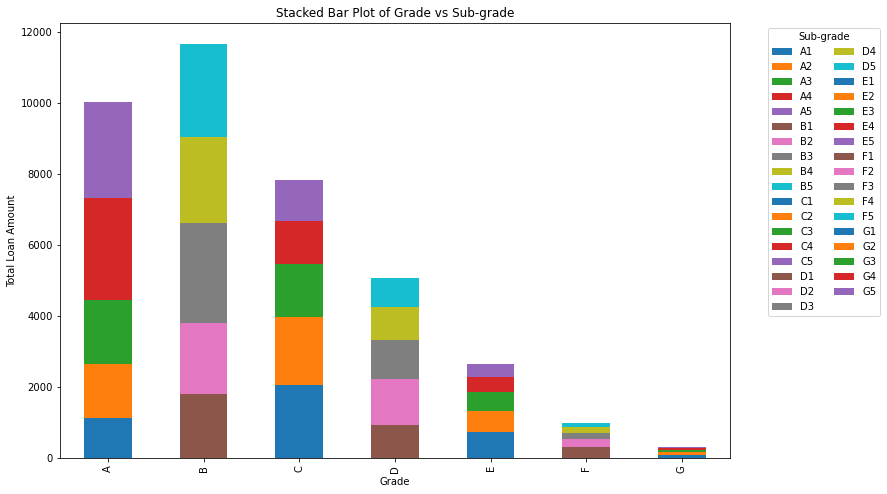

In [64]:
plt.figure(figsize=(12, 8))

# Create the stacked bar plot
sub_grade_counts.plot(kind='bar', stacked=True, ax=plt.gca())

# Move the legend outside the plot
plt.legend(title='Sub-grade', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2) 

plt.title('Stacked Bar Plot of Grade vs Sub-grade')
plt.xlabel('Grade')
plt.ylabel('Total Loan Amount')

plt.show()

This stacked Bar chart confirmes the same analysis we observed in the Loan Sub-Grade Count plot distribution which is the sub-grades A4, A5, B3, B4, B5, C1 and C2 are the most common.

Lets plot boxplots of the numerical variables to check for outliers

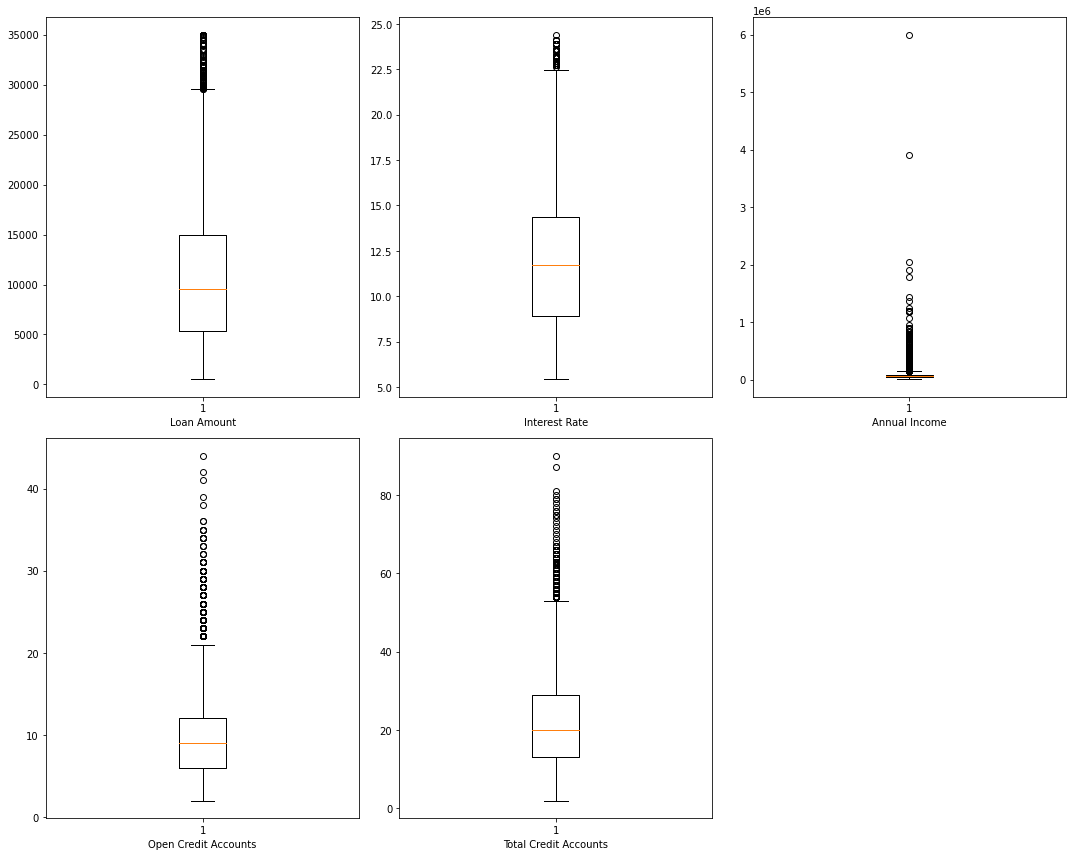

In [65]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 3, 1)
plt.boxplot(data=loan_df_filtered, x='loan_amnt')
plt.xlabel('Loan Amount')

plt.subplot(2, 3, 2)
plt.boxplot(data=loan_df_filtered, x='int_rate')
plt.xlabel('Interest Rate')

plt.subplot(2, 3, 3)
plt.boxplot(data=loan_df_filtered, x='annual_inc')
plt.xlabel('Annual Income')

plt.subplot(2, 3, 4)
plt.boxplot(data=loan_df_filtered, x='open_acc')
plt.xlabel('Open Credit Accounts')

plt.subplot(2, 3, 5)
plt.boxplot(data=loan_df_filtered, x='total_acc')
plt.xlabel('Total Credit Accounts')

plt.tight_layout()
plt.show()

In [66]:
loan_df_filtered[['loan_amnt', 'int_rate', 'annual_inc', 'open_acc', 'total_acc']].describe()

,loan_amnt,int_rate,annual_inc,open_acc,total_acc
count,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000
mean,11047.025430,11.932219,6.877797e+04,9.275423,22.052648
std,7348.441646,3.691327,6.421868e+04,4.401588,11.425861
min,500.000000,5.420000,4.000000e+03,2.000000,2.000000
25%,5300.000000,8.940000,4.000000e+04,6.000000,13.000000
50%,9600.000000,11.710000,5.886800e+04,9.000000,20.000000
75%,15000.000000,14.380000,8.200000e+04,12.000000,29.000000
max,35000.000000,24.400000,6.000000e+06,44.000000,90.000000


The above boxplots and the `describe()` function proves the observation of distributions earlier. 
- We see a central tendency of Loan Amount around 10,000 with most loans (IQR) between 5,300-15,000
- Interest rate central tendency is around 12% with IQR between 9-15% meaning most borrowers were paying 9-15% interest rate
- Annual Income has a central tendency of around 60k with most incomes between 40k to 80k. 
- We also observe that Open Credit Accounts have large number of outliers for higher values and have a central tendency of 9. 
- Similar behaviour as Open Credit Account is observed with Total Credit Accounts with a central tendency of around 20. Open credit accounts would be a subset of Total credit accounts. The differential indicates closed/repayed or some other factors etc.

Some more columns of interest could be few numerical variables like Installment ('installment'), Revolving Balance ('revol_bal'), Revolving Line Utilization ('revol_util') and Debt-To-Income Ratio ('dti') which tries to decipher the credit history of a person in terms of borrowing behaviour. We also try to see if the person has a Home Ownership which may indicate existing mortgages.

We will use Histograms for the numerical variables and countplot for the categorical ones ('home_ownership') and public derogatory records ('pub_rec')

Before that lets check the revol_util column if we need to clean any extra characters

In [67]:
loan_df_filtered['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

As we can see It has the '%' string which needs to be removed

In [68]:
loan_df_filtered['revol_util'] = loan_df_filtered['revol_util'].apply(lambda x: float(x[0:-1]) if x[-1] == '%' else float(x))

In [69]:
loan_df_filtered['revol_util'].head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

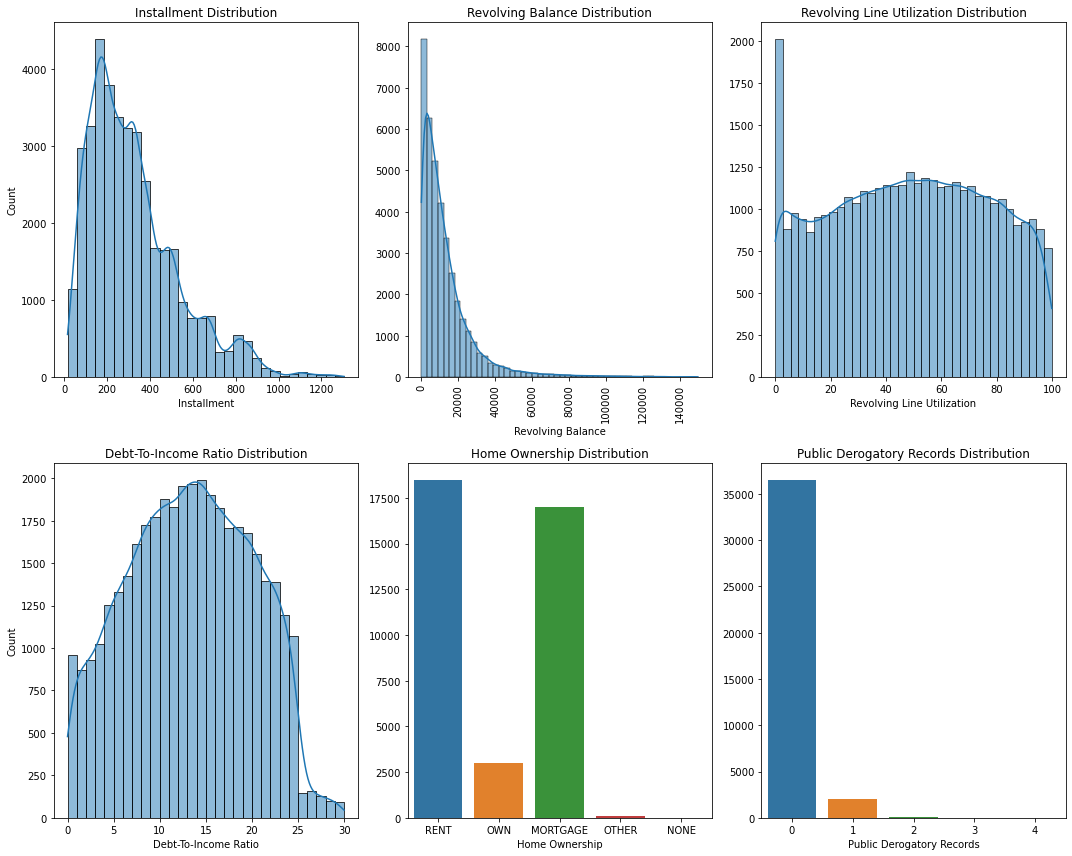

In [70]:
# Lets analyze the Installment, Revolving Balance, Revolving Utilization and Home Ownership for univariate analysis
plt.figure(figsize=(15, 12))

# Installment Distribution
plt.subplot(2, 3, 1)
sns.histplot(data=loan_df_filtered, x='installment', bins=30, kde=True)
plt.xlabel('Installment')
plt.title('Installment Distribution')

# Revolving Balance Distribution
plt.subplot(2, 3, 2)
sns.histplot(data=loan_df_filtered, x='revol_bal', bins=50, kde=True).set(ylabel=None)
plt.xticks(rotation=90)
plt.xlabel('Revolving Balance')
plt.title('Revolving Balance Distribution')

# Revolving Line Utilization Distribution
plt.subplot(2, 3, 3)
sns.histplot(data=loan_df_filtered, x='revol_util', kde=True).set(ylabel=None)
plt.title('Revolving Line Utilization Distribution')
plt.xlabel('Revolving Line Utilization')

# Debt-To-Income Ratio Distribution
plt.subplot(2, 3, 4)
sns.histplot(data=loan_df_filtered, x='dti', bins=30, kde=True)
plt.title('Debt-To-Income Ratio Distribution')
plt.xlabel('Debt-To-Income Ratio')

# Home Ownership Distribution
plt.subplot(2, 3, 5)
sns.countplot(data=loan_df_filtered, x='home_ownership').set(ylabel=None)
plt.title('Home Ownership Distribution')
plt.xlabel('Home Ownership')

# Public Derogatory Records Distribution
plt.subplot(2, 3, 6)
sns.countplot(data=loan_df_filtered, x='pub_rec').set(ylabel=None)
plt.title('Public Derogatory Records Distribution')
plt.xlabel('Public Derogatory Records')

plt.tight_layout()
plt.show()

**Analysis**:

***Loan Installment Distribution***: The graph is right skewed and the maximum number of installaments seem to be around 200-300. 

***Revolving Balance***: The distribution of total credit revolving balances is highly skewed, with many borrowers having low to moderate balances, and a few borrowers with very high revolving balances. The long tail of the distribution suggests the presence of outliers

***Revolving Line Utilzation***: Revolving utilization (the percentage of available credit that is used) shows a distribution where many borrowers are using a moderate to high percentage of their available credit. It appears that some borrowers may even be using nearly all of their available credit (100% utilization)

***Debt-To-Income Ratio***: A higher DTI may indicate an already burdened borrower before current loan and from the graph it appears there are large number of borrowers peaking between 10-16. very high DTI 25-30 have lower number of borrowers.

***Home Ownership***: Most people borrowing are on rent. Now this may indicate they may be interested in applying for home mortgage/loan and that would need deeper analysis. The number of home owners with mortage is also high.

***Public Derogatory Records***: Most borrowers have zero public derogatory records and few have 1-2

Lets plot the boxplot visualizations to detect outliers on installment, revolving credit balance and revolving credit utilization

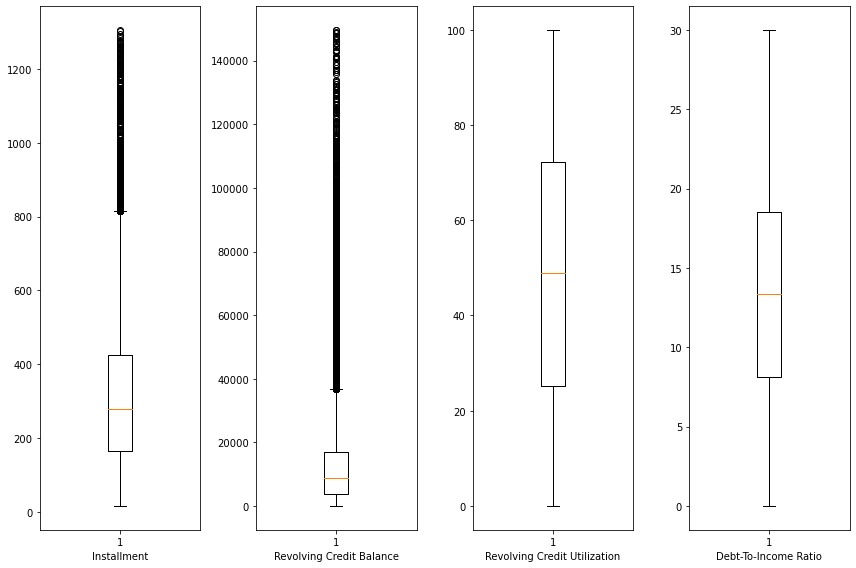

In [71]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 4, 1)
plt.boxplot(data=loan_df_filtered, x='installment')
plt.xlabel('Installment')

plt.subplot(1, 4, 2)
plt.boxplot(data=loan_df_filtered, x='revol_bal')
plt.xlabel('Revolving Credit Balance')

plt.subplot(1, 4, 3)
plt.boxplot(data=loan_df_filtered, x='revol_util')
plt.xlabel('Revolving Credit Utilization')

plt.subplot(1, 4, 4)
plt.boxplot(data=loan_df_filtered, x='dti')
plt.xlabel('Debt-To-Income Ratio')

plt.tight_layout()
plt.show()

In [72]:
loan_df_filtered[['installment', 'revol_bal', 'revol_util', 'dti']].describe()

,installment,revol_bal,revol_util,dti
count,38577.000000,38577.000000,38577.000000,38577.000000
mean,322.466318,13289.489826,48.639653,13.272727
std,208.639215,15866.492241,28.400460,6.673044
min,15.690000,0.000000,0.000000,0.000000
25%,165.740000,3650.000000,25.100000,8.130000
50%,277.860000,8762.000000,49.000000,13.370000
75%,425.550000,16912.000000,72.200000,18.560000
max,1305.190000,149588.000000,99.900000,29.990000


**Analysis**

For Installment, the central tendency is around 278 and there are a lot of outliers beyond 800 till around 1300. We need to check the interest rate, and annual income for these outliers. Typically a higher installment indicates a higher loan amount and interest which can only be afforded by people with higher income. Need to check if we have default cases here and observe the trend.

For Revolving Credit Balance, the central tendency is around 8700-9000 and a huge number of outliers beyond 34,000. We need to check if some of the loan defaulters have high credit revolving balance


For Revolving Credit Utilization a large number of folks have 49-50 % utilization and some even have upto 99.9 (max). We detect no outliers but in general its an evenly distributed plot which shows low to moderate credit utilization.

For DTI, the central tendency is around 13.4 with no outliers. 50% of people have a DTI between 8-18%

## 5. Bivariate and Multivariate Analysis

We will now proceed to determine relationships/correlation between above variables analyzed during Univariate analysis to determine any significant relationships between them and observe the trends. If there is a need we will also try to create some derived metrics to drive more insights

Lets plot the Loan Status ("Fully Paid" and "Charged off") vs other variables like Loan Amount, Interest rate, Loan Grades, Installment, Revolving Credit Balance and Utilization, Debt-To-Income Ratio and Open Credit Accounts

We will classify loans as defaulted if the status is "Charged Off" and not defaulted if it is "Fully Paid."

Lets create a new column for default_status based on this, then proceed with the analysis

In [73]:
loan_df_filtered['default_status'] = loan_df_filtered['loan_status'].apply(lambda x: 1 if x== 'Charged Off' else 0)

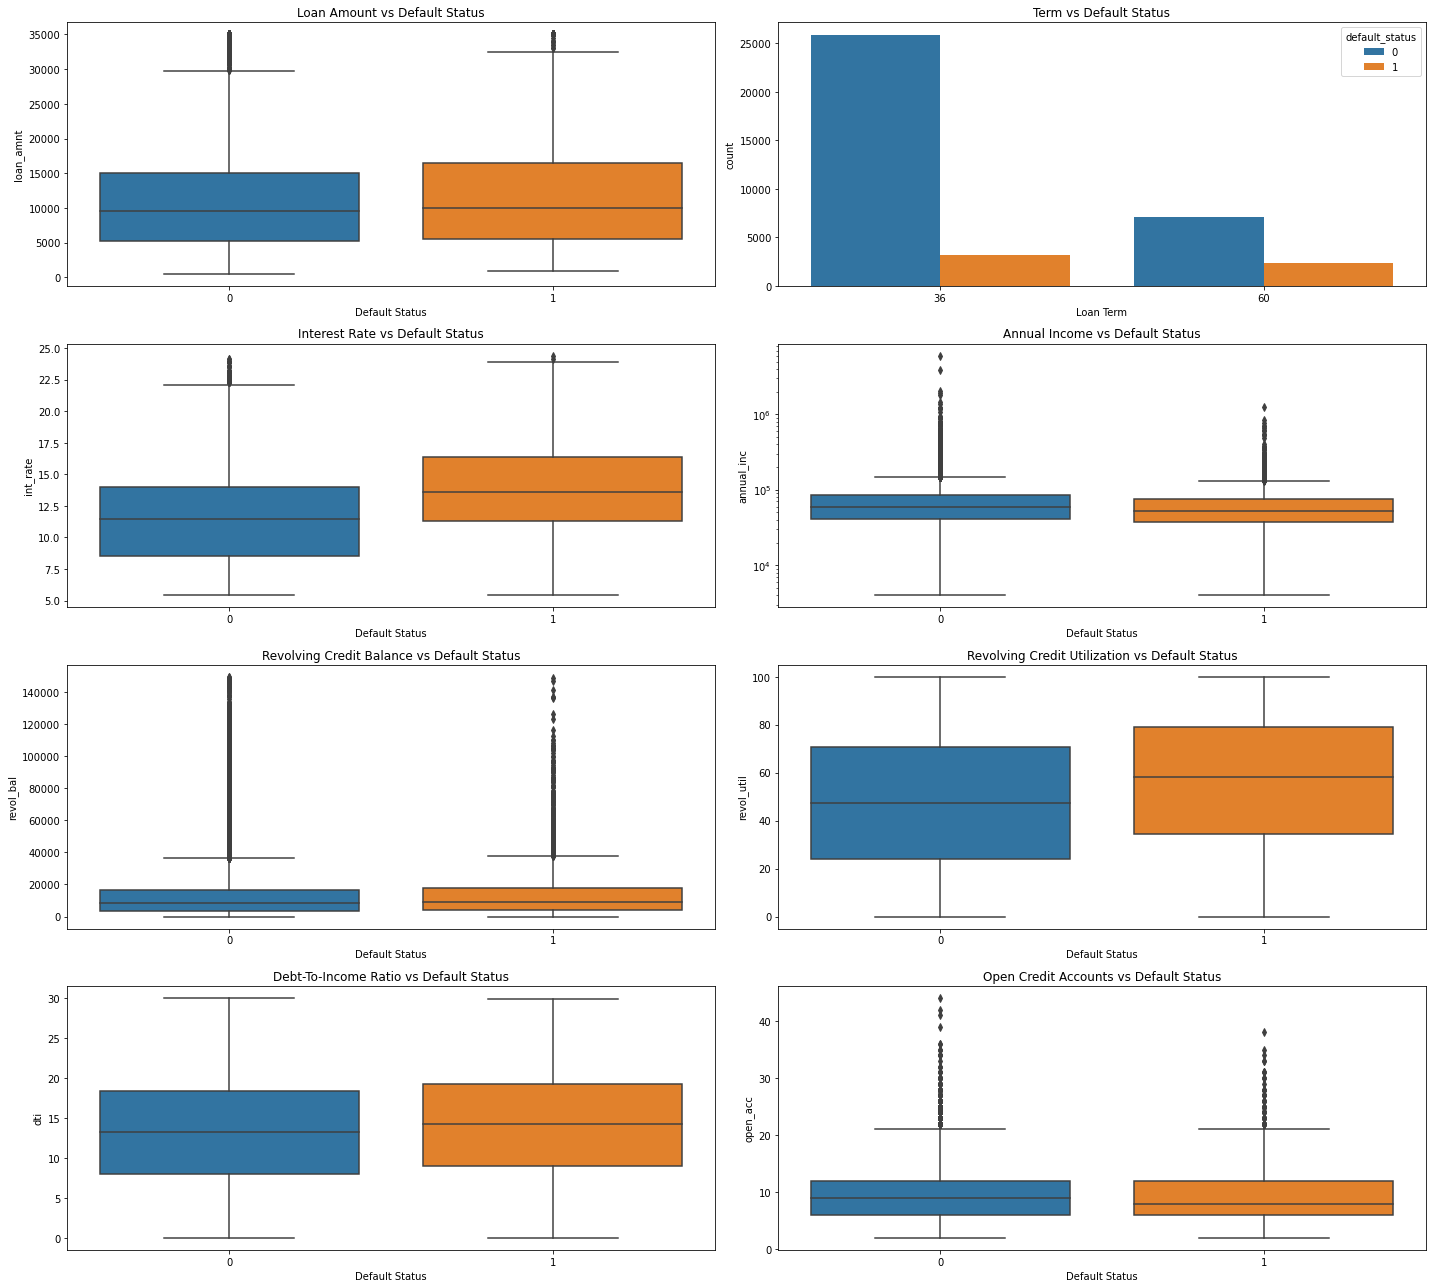

In [74]:
plt.figure(figsize=[20, 18])

# Loan Amount vs Default Status
plt.subplot(4, 2, 1)
sns.boxplot(x='default_status', y='loan_amnt', data=loan_df_filtered)
plt.xlabel('Default Status')
plt.title('Loan Amount vs Default Status')

# Term vs Default Status
plt.subplot(4, 2, 2)
sns.countplot(x='term', hue='default_status', data=loan_df_filtered)
plt.xlabel('Loan Term')
plt.title('Term vs Default Status')

# Interest Rate vs Default Status
plt.subplot(4, 2, 3)
sns.boxplot(x='default_status', y='int_rate', data=loan_df_filtered)
plt.xlabel('Default Status')
plt.title('Interest Rate vs Default Status')

# Annual Income vs Default Status
plt.subplot(4, 2, 4)
sns.boxplot(x='default_status', y='annual_inc', data=loan_df_filtered)
plt.xlabel('Default Status')
plt.yscale('log')
plt.title('Annual Income vs Default Status')

# Revolving Credit Balance vs Default Status
plt.subplot(4, 2, 5)
sns.boxplot(x='default_status', y='revol_bal', data=loan_df_filtered)
plt.xlabel('Default Status')
plt.title('Revolving Credit Balance vs Default Status')

# Revolving Credit Utilization vs Default Status
plt.subplot(4, 2, 6)
sns.boxplot(x='default_status', y='revol_util', data=loan_df_filtered)
plt.xlabel('Default Status')
plt.title('Revolving Credit Utilization vs Default Status')

# DTI vs Default Status
plt.subplot(4, 2, 7)
sns.boxplot(x='default_status', y='dti', data=loan_df_filtered)
plt.xlabel('Default Status')
plt.title('Debt-To-Income Ratio vs Default Status')

# Open Credit Accounts vs Default Status
plt.subplot(4, 2, 8)
sns.boxplot(x='default_status', y='open_acc', data=loan_df_filtered)
plt.xlabel('Default Status')
plt.title('Open Credit Accounts vs Default Status')


plt.tight_layout()
plt.show()

**Analysis**:

***Loan Amount vs Default Status***: Higher loan amounts seem slightly associated with defaults, though the difference is not high. Its not a key discriminator.

***Term vs Default Status***: Loans with a 60-month term appear more likely to default compared to those with a 36-month term.

***Interest Rate vs Default Status***: Loans with higher interest rates have a stronger association with defaults.

***Annual Income vs Default Status***: Borrowers with lower annual incomes show a higher tendency to default, while higher-income borrowers are less likely to default but it is also a weak trend.

***Revolving Credit balance vs Default Status***: There is a slightly higher median for defaulters and the range is slightly higher. This is understandable as the defaulter category may rely on credit balance and may be financially strained thereby increasing the likelyhood of defaults.

***Revolving Credit Line Utilization vs Default Status***: It is quite obvious that defaulters have a much higher median and IQR for credit utilization compared to non-defaulters i.e defaulters use a higher percentage of their available credit. This could be an important flag for the consumer lending company as borrowers with higher revolving utilization may be sign that they may be maxing out on their credits thereby increasing the chances of default if loan is approved. Higher credit utilization is often a predictor of financial instability.

***Debt-To-Income Ration vs Default Status***: It is observed that defaulters have a higher DTI median compared to fully paid borrowers.

***Open Credit Accounts vs Default Status***: It is interesting to see the median of credit accounts lower for defaulters. In general there is a tendency to have lower number of open credit accounts for defaulters

Lets also try to understand the relationship between Loan Grades and Interest Rates

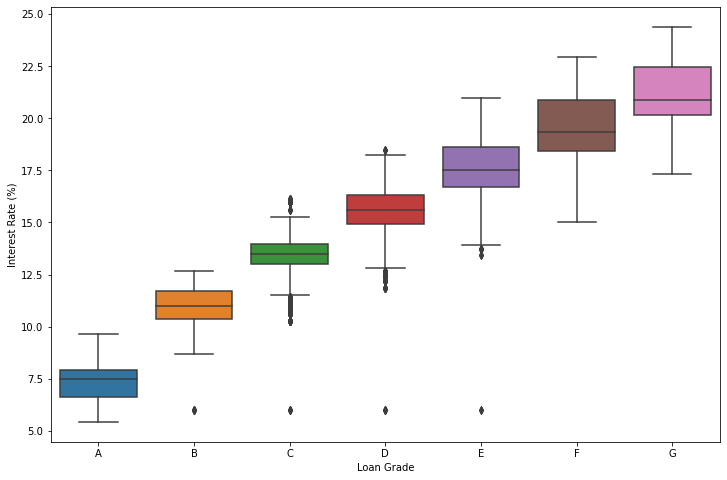

In [75]:
plt.figure(figsize=[12,8])
sns.boxplot(data=loan_df_filtered, x='grade', y='int_rate', order=sorted(loan_df_filtered['grade'].unique()))
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (%)')
plt.show()

**Analysis**:

1. The plot clearly demonstrates that higher loan grades namely A and B have lower interest rates and lower loan grades from C to G have much higher interst rates.
2. The higher loan grades namely A, B and C have much consistent interest rates with smaller variability with no or very few outliers
3. The lower loan grades particularly E, F and G have much higher interest rates, higher variability in the rates (high IQR).
4. This observation aligns with "risk-based pricing" strategy used in lending, where riskier loans are charged higher interest rates to mitigate potential losses

Lets check the relationship of Default behaviour with Income Verification Status, Loan Purpose, Number of Credit Inquiries and Employment length.

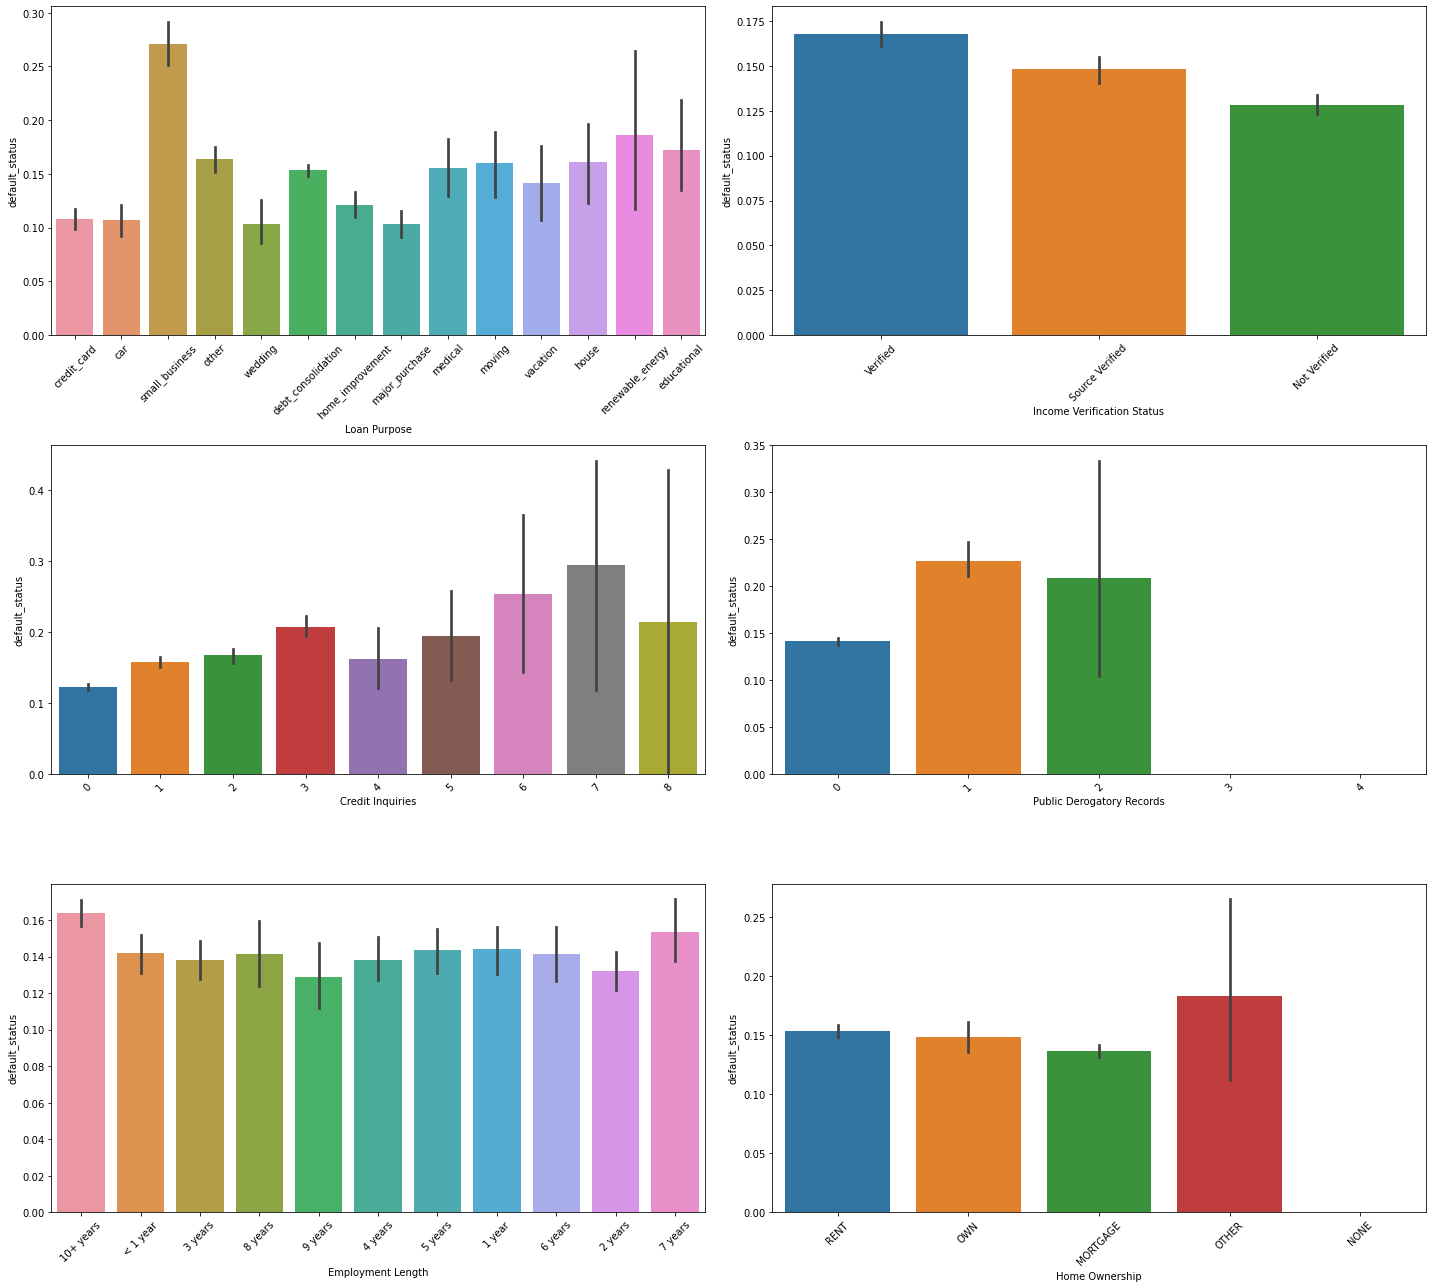

In [76]:
plt.figure(figsize=[20,18])

plt.subplot(3,2,1)
# Relationship between Loan Purpose and Default behaviour
sns.barplot(data=loan_df_filtered, x='purpose', y='default_status')
plt.xticks(rotation=45)
plt.xlabel('Loan Purpose')

plt.subplot(3,2,2)
# Relationship between Income Verification Status and Default behaviour
sns.barplot(data=loan_df_filtered, x='verification_status', y='default_status')
plt.xticks(rotation=45)
plt.xlabel('Income Verification Status')

plt.subplot(3,2,3)
# Relationship between Credit Inquiries and Default behaviour
sns.barplot(data=loan_df_filtered, x='inq_last_6mths', y='default_status')
plt.xticks(rotation=45)
plt.xlabel('Credit Inquiries')

plt.subplot(3,2,4)
# Relationship between Public Derogatory Records and Default behaviour
sns.barplot(data=loan_df_filtered, x='pub_rec', y='default_status')
plt.xticks(rotation=45)
plt.xlabel('Public Derogatory Records')

plt.subplot(3,2,5)
# Relationship between Public Derogatory Records and Default behaviour
sns.barplot(data=loan_df_filtered, x='emp_length', y='default_status')
plt.xticks(rotation=45)
plt.xlabel('Employment Length')

plt.subplot(3,2,6)
# Relationship between Home Ownership and Default behaviour
sns.barplot(data=loan_df_filtered, x='home_ownership', y='default_status')
plt.xticks(rotation=45)
plt.xlabel('Home Ownership')

plt.tight_layout()
plt.show()


**Analysis**

***Relationship between Loan Purpose and Default behaviour***: It appears that loans for small business defaulted the most. It may be a risky category for first time investors and chances of business failures may be high

***Relationship between Income Verification Status and Default behaviour***: It is surprising to see that borrowers with verified incomes defaulted more

***Relationship between Credit Inquiries and Default behaviour***: It does look like in general as number of inquiries increase the chances of default behavior increase as well with the pattern peaking at 7 inquiries in last 6 months

***Relationship between Public Derogatory Records and Default behaviour***: It looks like 1-2 derogatory records do contribute to default behaviour

***Relationship between Employment Length and Default behaviour***: Doesn't seem to be a great discriminator

***Relationship between Home Ownership and Default behaviour***: It seems like the 'other' and 'rent' categories tend to have more defaults. Not entirely sure what other means in the dataset. It could indicate the borrower to be a dependent.

Lets also use other visualization techniques to observe some more relationships. We will use pairplots and heatmaps to check relationships

<Figure size 1080x864 with 0 Axes>

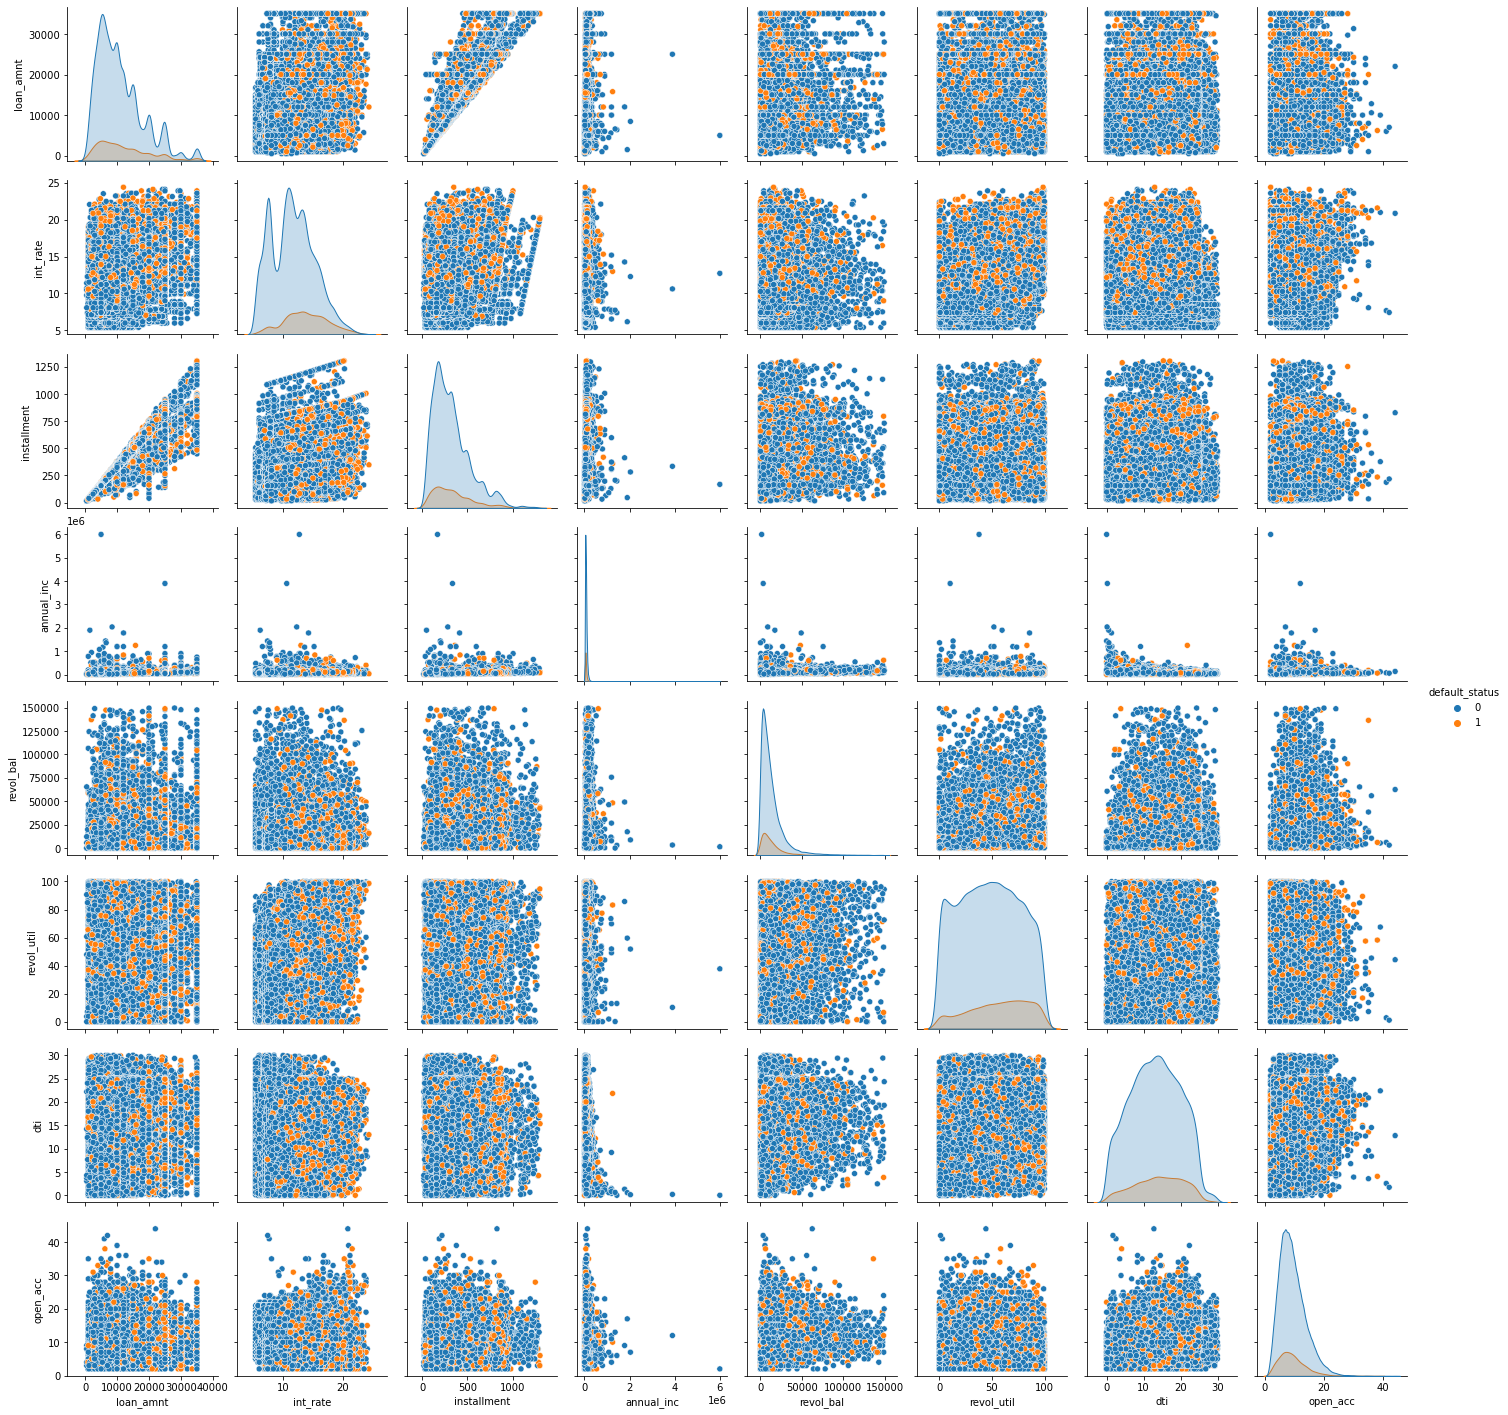

In [77]:
# Creating a pair plot with variables of interest mixing in default status to showcase the patterns
plt.figure(figsize=[15,12])
sns.pairplot(data=loan_df_filtered[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'default_status', 'revol_bal', 'revol_util', 'dti', 'open_acc']], hue='default_status', diag_kind='kde')
plt.show()

**Analysis**

The pair plot shows similar patterns as the boxplots earlier. We will interpret this in context of default status
1. Shows a pattern of higher defaults with higher loan amount
2. Higher interest rate also increases the possibility of defaults
3. Higher revolving credit balance tends to indicate higher chances of defaults
4. Higher revolving credit utilization also tends to indicate a risk of defaults
5. Higher loan amounts also increase installments (positive correlation) which may indicate higher default rates
6. Lower income individuals might indicate a higher tendency of defaults while higher income borrowers have lesser risk of defaults
7. Higher debt-to-income ratios result in higher defaults
8. Having higher number of open credit accounts shows reliance on credit and borrowing behaviour.
9. We also understood from a previous boxplot between loan grades and interest rates that lower loan grades have higher and more variable interest rates and few borrowers may not qualify for higher loan grades due to credit status or other factors. With higher interest rates, higher installments, higher DTI coupled with lower income, such borrowers present a high risk category.


In order to see multidimensional correlation we will adopt a heatmap visialization, but prior to that we will convert two categprical variables namely Loan Grade and Sub-Grade into a numerical representation.

In [78]:
# Create a new column grade_n which is a numerical representation of original grade data
loan_df_filtered['grade_n'] = pd.factorize(loan_df_filtered['grade'])[0]

# Create a new column sub_grade_n which is a numerical representation of original sub_grade data
loan_df_filtered['sub_grade_n'] = pd.factorize(loan_df_filtered['sub_grade'])[0]

In [79]:
# Check the factorized Loan Grade values
loan_df_filtered['grade_n'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [80]:
# Check the factorized Loan Sub-Grade values
loan_df_filtered['sub_grade_n'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34])

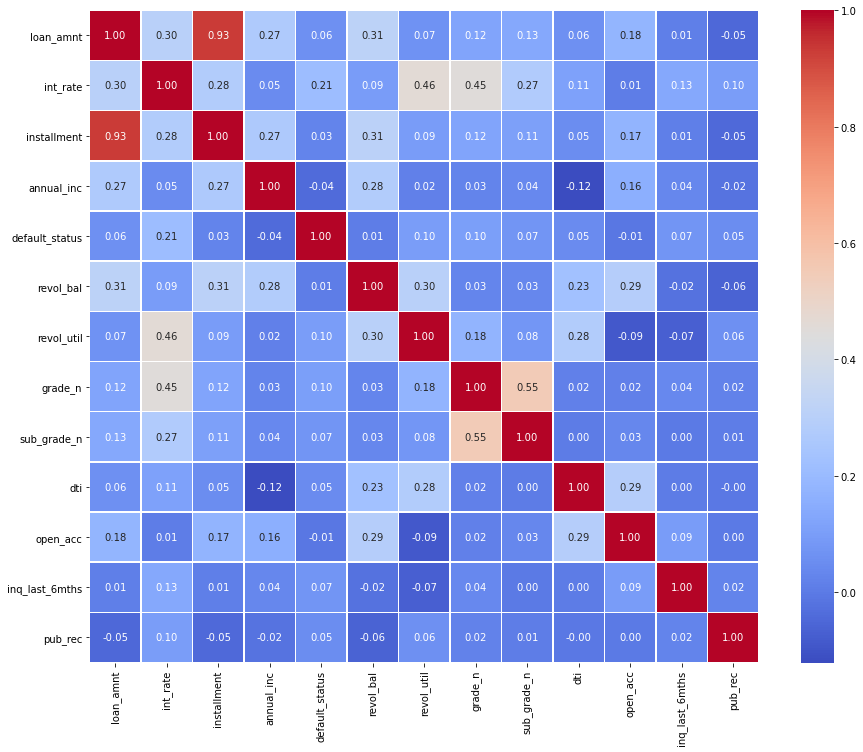

In [81]:
# We are going to create the heatmap for numerical variables and check the correlations between them
plt.figure(figsize=[15,12])
sns.heatmap(loan_df_filtered[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'default_status', 'revol_bal', 'revol_util', 'grade_n', 'sub_grade_n', 'dti', 'open_acc', 'inq_last_6mths', 'pub_rec']].corr(), annot = True, cmap='coolwarm', fmt = ".2f", linewidths=0.5)
plt.show()

**Analysis**

1. The heatmap shows some high positive correlation between
    - Loan Amount and Installment: This is obvious as higher loan amount would require larger EMIs or payments


2. It also shows low to moderate positive correlation between
    -  _Loan Amount and Interest rate_: Higher Loan amount may present higher risk of repayment so a higher interest rate may be applied
    -  _Loan Amount and Annual Income_: Higher Annual income may provide higher confidence of loan repayment and may qualify for higher loan amounts
    - _Loan Amount and Revolving Credit Balance_: A loan represents a credit balance hence indicate a higher loan may result in a higher revolving credit balance
    - _Interest rate and Revolving Credit Utilization_: A higher interest rate could result in higher utilization of available credit
    - _Interest rate and Loan Grade_: Higher Loan grades have lower and consistent interest rates whereas lower loan grades have higher and more variable interest rates to compensate for the risks of defaults

    - _Installment and Revolving Credit Balance_: Higher installment may deter savings and consume available credit
    - _Installment and Annual Income_: Borrowers with higher income may be able to afford higher installments
    - _Installment and Interest Rate_: Higher Interest rate may result in higher installment payments
    - _Default Status and Interest rate_: Higher interest rate may cause financial strain and result in defaults
    - _Revolving Credit Balance and Revolving Credit Uilization_: Higher Credit balance may cause some borrowers to use them more resulting in higher credit line utilization
    - _Revolving Credit Balance and Annual Income_: Higher income borrowers may have a higher available credit balance
    - _Loan Grade and Sub-Grade_: The Loan sub-grades are distributed as per the Grades, so there is a postive correlation bewteen them. Higher grades will have higher sub-grades and lower grades will have lower sub-grades
    - _Debt-To-Income Ratio and Revolving Credit Utilization_: DTI has some positive correlation with credit line utilization which signifies that higher credit utilization would tend to indicate higher DTI.
    - Debt-To-Income Ratio and Open Credit Accounts_: Higher number of open credit accounts tend to have a higher DTI
    - _Revolving Credit Balance and Open Credit Accounts_: Higher number of open creddit accounts tend to carry higher credit balance
 

3. The heatmap also shows a weak negative correlation bewteen
     - _Default Status and Annual Income_: Borrowers with higher income have a lower chance of default
     - _Debt-To-Income Ratio and Annual Income_: Borrowers with higher income tend to have a lower DTI
     - _Default Status and Open Credit Account_: There is a tendency to have lower number of open credit accounts for defaulters
     - _Loan Amount/Installment/Annual Income/Revolving Balance and Derogatory Public Records_: Borrowers with higher loan amounts (and corresponding installments) with higher income and lower revolving credit balance tend to have less number of derogatory records
     

## 6. Derived Metrics

As next step let us analyze if we can derive some metrics from exiting data and use that to drive additional insights

In [82]:
# Derived Metrics:

# 2. High-interest loan indicator (int_rate > 15%)
# 3. Long-term loan indicator (term == 60)
# 4. Income category (Low, Medium, High based on quantiles)
# 5. Loan amount category ('Low', Middle', 'High' based on quantiles)

# Creating derived metrics

loan_df_filtered['high_interest'] = loan_df_filtered['int_rate'].apply(lambda x: 1 if x > 15 else 0)
loan_df_filtered['long_term_loan'] = loan_df_filtered['term'].apply(lambda x: 1 if x == 60 else 0)

# Creating income categories
loan_df_filtered['income_category'] = pd.cut(loan_df_filtered['annual_inc'], bins=3, labels=['Low', 'Middle', 'High'])

# Creating loan amount categories
loan_df_filtered['loan_amnt_category'] = pd.qcut(loan_df_filtered['loan_amnt'], 3, labels=['Small', 'Medium', 'Large'])

# Selecting the new variables and displaying them
derived_columns = ['dti', 'high_interest', 'long_term_loan', 'income_category', 'loan_amnt_category', 'default_status']

# Displaying the first few rows with the derived columns
loan_df_filtered[derived_columns].head()


,dti,high_interest,long_term_loan,income_category,loan_amnt_category,default_status
0,27.65,0,0,Low,Small,0
1,1.00,1,1,Low,Small,1
2,8.72,1,0,Low,Small,0
3,20.00,0,0,Low,Medium,0
5,11.20,0,0,Low,Small,0


Lets proceed with some univariate and bivariate/multivariate analysis with these derived metrics to arrive at final conclusions

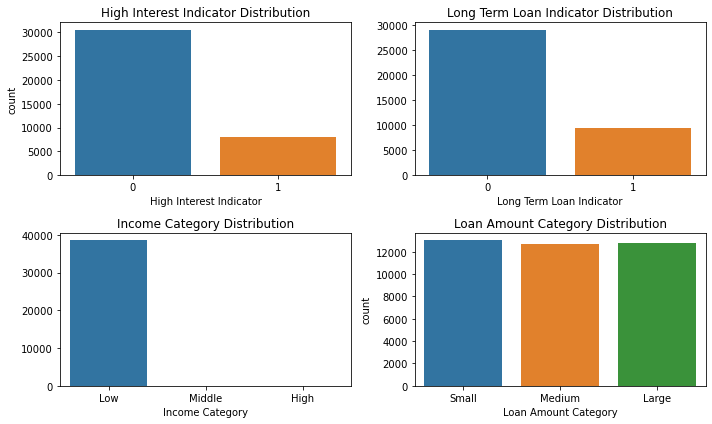

In [83]:
# We have done Debt-To-Income Ratio and Default Status analysis previously.
# Lets analyze the High Interest, Long Term Loan, Income Category and Loan Amount Category univariate analysis
plt.figure(figsize=(10, 6))

# High Interest Distribution
plt.subplot(2, 2, 1)
sns.countplot(data=loan_df_filtered, x='high_interest')
plt.xlabel('High Interest Indicator')
plt.title('High Interest Indicator Distribution')

# Long term Loan Indicator Distribution
plt.subplot(2, 2, 2)
sns.countplot(data=loan_df_filtered, x='long_term_loan').set(ylabel=None)
plt.xlabel('Long Term Loan Indicator')
plt.title('Long Term Loan Indicator Distribution')

# Income Category Distribution
plt.subplot(2, 2, 3)
sns.countplot(data=loan_df_filtered, x='income_category').set(ylabel=None)
plt.xlabel('Income Category')
plt.title('Income Category Distribution')


# Loan Amount Category Distribution
plt.subplot(2, 2, 4)
sns.countplot(data=loan_df_filtered, x='loan_amnt_category')
plt.xlabel('Loan Amount Category')
plt.title('Loan Amount Category Distribution')



plt.tight_layout()
plt.show()

In [84]:
# Percentage of High interest loans
high_int_perc = round(100*loan_df_filtered['high_interest'].mean())

# Percentage of Long term loans

long_term_loan_perc = round(100*loan_df_filtered['long_term_loan'].mean())

# Percentage of low income borrowers

low_inc_perc = round(100*len(loan_df_filtered[loan_df_filtered['income_category'] == 'Low'])/len(loan_df_filtered))

# Percentage of Small & Medium sized loans

small_med_loan_amnt = round(100*len(loan_df_filtered[(loan_df_filtered['loan_amnt_category'] == 'Small') | (loan_df_filtered['loan_amnt_category'] == 'Medium')])/len(loan_df_filtered))

print("--------------------------------")
print("Percentage of High Interest loans: ", str(high_int_perc) + '%')
print("Percentage of Long Term loans: ", str(long_term_loan_perc) + '%')
print("Percentage of Low Income borrowers: ", str(low_inc_perc)+ '%')
print("Percentage of Small & Medium sized loans: ", str(small_med_loan_amnt) + '%')

--------------------------------
Percentage of High Interest loans:  21%
Percentage of Long Term loans:  25%
Percentage of Low Income borrowers:  100%
Percentage of Small & Medium sized loans:  67%


Lets now understand the correlation of these variables with Default status

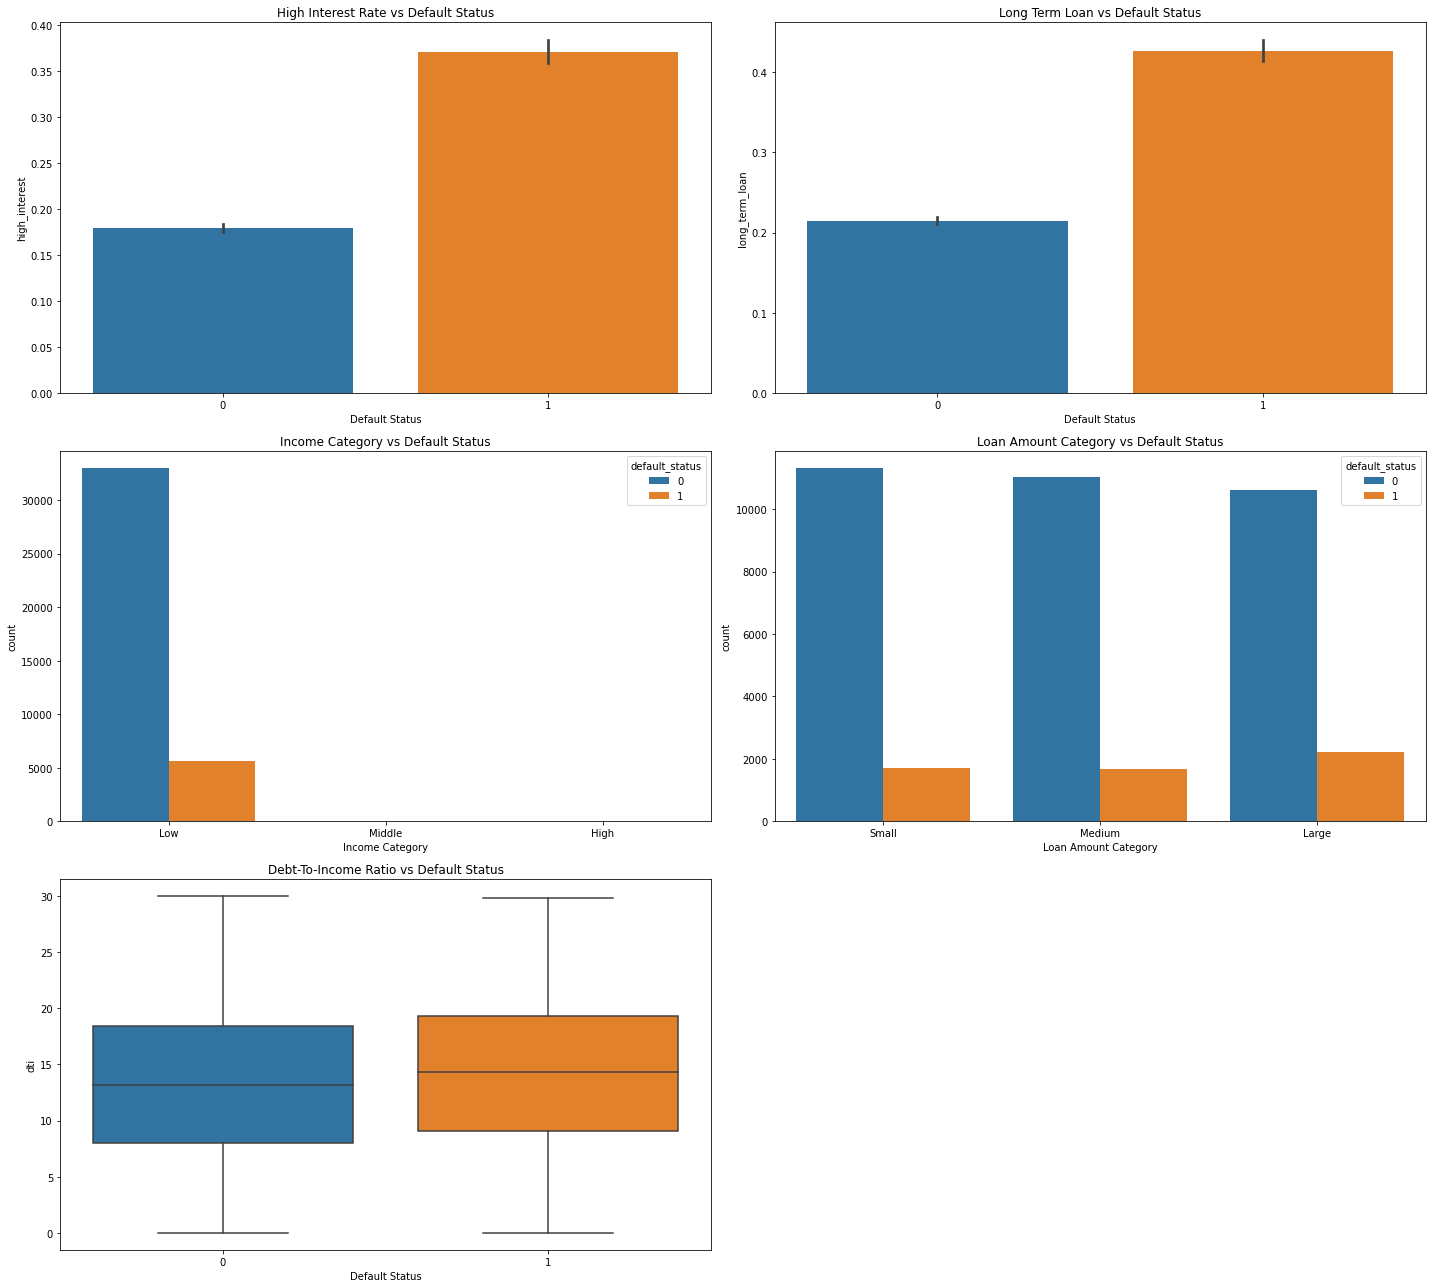

In [85]:
plt.figure(figsize=[20, 18])

# High Interest Rate vs Default Status
plt.subplot(3, 2, 1)
sns.barplot(x='default_status', y='high_interest', data=loan_df_filtered)
plt.xlabel('Default Status')
plt.title('High Interest Rate vs Default Status')

# Loan Term Loan vs Default Status
plt.subplot(3, 2, 2)
sns.barplot(x='default_status', y='long_term_loan', data=loan_df_filtered)
plt.xlabel('Default Status')
plt.title('Long Term Loan vs Default Status')

# Income Category vs Default Status
plt.subplot(3, 2, 3)
sns.countplot(x='income_category', hue='default_status', data=loan_df_filtered)
plt.xlabel('Income Category')
plt.title('Income Category vs Default Status')

# Loan Amount Category vs Default Status
plt.subplot(3, 2, 4)
sns.countplot(x='loan_amnt_category', hue='default_status', data=loan_df_filtered)
plt.xlabel('Loan Amount Category')
plt.title('Loan Amount Category vs Default Status')


# DTI vs Default Status
plt.subplot(3, 2, 5)
sns.boxplot(x='default_status', y='dti', data=loan_df_filtered)
plt.xlabel('Default Status')
plt.title('Debt-To-Income Ratio vs Default Status')


plt.tight_layout()
plt.show()

**Analysis**

- High Interest Rate leads to more number of loan defaults
- Longer Term loans (5 yrs) leads to more number of loan defaults
- Income Category is not a significant discriminator for defaults as majority of borrowers are concentrated on low income category
- Larger loans tend to be riskier in terms of default though not a very strong trend
- Higher Debt-To-Income Ratio does indicate a level of risk for loan default

## 7. Conclusion

After a long process of analysis, we will conclude on few strong indicators/patterns for loan defaults. The associated rationale is also documented

1. **Interest Rate ('int_rate')**: Borrowers with higher interest rates are more likely to default. Lenders typically charge higher interest rates to borrowers with lower creditworthiness, which is often associated with a higher probability of default. Loans with interest rates above 15% (high-interest loans) are particularly risky and show a higher correlation with defaults.

2. **Loan Term ('long_term_loan')**: Borrowers with longer loan terms (60 months) are more likely to default compared to those with shorter loan terms (36 months). Longer loans carry more risk, as the borrower has to manage payments over a longer period

3. **Loan Purpose ('purpose')**: Small Business seem to be a likely risky category as individuals investing in small business (specially if for the first time) and seeking capital for it has a higher chance of failure in their business. 

4. **Revolving Utilization ('revol_util')**: High revolving credit utilization signals that the borrower is heavily reliant on available credit, which increases their risk of financial distress and default.

5. **Debt-to-Income Ratio ('dti')**: A higher debt-to-income ratio indicates that a borrower has a significant portion of their income dedicated to debt repayment (and less money available for additonal expenses or unforeseen circumstances), increasing their likelihood of default

6. **Credit Inquiries ('inq_last_6mths')**: In general if a borrower has high number of credit inquiries over a short period of time (6 months), it shows financial strain as they are trying to arrange for credit resulting in some financial institutions looking up their credit files.

7. **Loan Amount ('loan_amnt_category')**: Larger loans carry higher risks as it would generally carry higher interest rates and installments over longer term. Unless the borrower is of sound income, it is usually hard to manage larger loans.